# Journey

---
## Setup

### Import Modules

In [15]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt

### Configure Modules

In [193]:
#print(plt.rcParams.keys())

FONTSIZE = 14

plt.rcParams["axes.facecolor"]    = "white"
plt.rcParams["savefig.facecolor"] = "white"
plt.rcParams["savefig.dpi"]       = 400
plt.rcParams["savefig.bbox"]       = "tight"
plt.rcParams["svg.fonttype"]      = 'none'
plt.rcParams["font.size"]         = FONTSIZE
plt.rcParams["lines.linewidth"]   = 1

### Import Data

In [341]:
data_df = pd.read_csv("data.txt", sep="\t")
display(data_df)

,date,time,meal
0,2021-09-07,09:30,Breakfast
1,2021-09-07,13:00,Lunch
2,2021-09-07,18:30,Supper
3,2021-09-08,09:30,Breakfast
4,2021-09-08,13:00,Lunch
5,2021-09-08,18:30,Supper


1900-01-01 09:30:00
1900-01-01 13:00:00
1900-01-01 18:30:00
1900-01-01 09:30:00
1900-01-01 13:00:00
1900-01-01 18:30:00


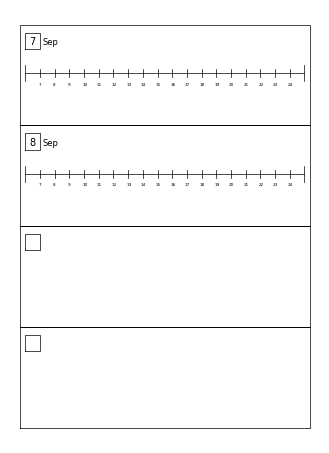

In [348]:
dpi = 50 # Low for testing
ratio = 11.75 / 8.25
figsize = [8.25, 11.75] #A4 Paper Dimensions
time_start = 7
time_end = 25

fig, ax = plt.subplots(1, dpi=dpi, figsize=figsize)

# Hide Axis Ticks
ax.axis("off")

# Draw frame    
x = [0, 0, 1, 1, 0]
y = [0, 1, 1, 0, 0]
ax.plot(x, y, c="black")

# Day dividers
y = [0.25, 0.5, 0.75]
for coord in y:
    ax.plot([0,1], [y,y], c="black")
    
# Date squares
x_s, x_w = 0.02, 0.05
y_s, y_h = 0.94, 0.04

x_coords = [x_s, x_s, x_s + x_w, x_s + x_w, x_s]
y_coords = [y_s, y_s + y_h, y_s + y_h, y_s, y_s]

for adjust in [0, 0.25, 0.5, 0.75]:
    x = x_coords
    y = [c - adjust for c in y_coords]
    ax.plot(x, y, c="black")
    
# Date Numbers
x, y = x_s, y_s

# Iterate through each day
for date in sorted(set(data_df["date"])):
    
    date_df = data_df[data_df["date"] == date]

    # Date Box
    entry_date = datetime.datetime.strptime(date, "%Y-%m-%d")
    day = entry_date.day
    month = entry_date.strftime("%b")
    x = x_s
    ax.annotate(day, xy=[x + (x_w/4),y + (y_h/4)])
    ax.annotate(month, xy=[x + (x_w * 1.2),y + (y_h/4)], fontsize=FONTSIZE-2)
    
    # Timeline
    # End Points
    time_maj_x = [x, x]
    time_maj_y = [y - y_h, y - (y_h)* 2]
    ax.plot(time_maj_x, time_maj_y, c="black")
    time_maj_x = [1-x_s, 1-x_s]
    ax.plot(time_maj_x, time_maj_y, c="black")
    ax.plot([x, 1-x], [y - (y_h* 1.5), y - (y_h* 1.5)], c="black",)

    
    # Minor Ticks
    minor_ticks = time_end - time_start
    intervals = 1-x_s - x_s
    minor_x_adjust = intervals / (minor_ticks + 1)
    for time in range(time_start, time_end):
        x = x + minor_x_adjust
        ax.plot([x, x], [y-(y_h*1.25), y-(y_h*1.75)], c="black",)
        ax.annotate(time, xy=[x-(x_w/8),y-(y_h*2.25)], fontsize=FONTSIZE-8)
    # Reset x
    x = x_s
    
    # Iterate through each time
    for str_meal_time in sorted(set(date_df["time"])):
        meal_time = datetime.datetime.strptime(str_meal_time, "%H:%M")
        print(meal_time)
        
    # Adjust new y position for new day
    y = y-0.25


plt.savefig("page.pdf")